# Herkunftsländer der Arbeitnehmer (Weltkarte)

In [649]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
import modules
plt.style.use('../own_style.mplstyle')
from geopandas import GeoDataFrame
import geopandas

In [650]:
#cleanup.generate_cleaned_df()

In diesem Kapitel sollen die Herkunftsländer der Arbeitnehmer auf einer Weltkarte visualisiert werden.
Zuerst wird dafür die Spalte `country_of_citizenship` importiert.

In [651]:
col_list = ["country_of_citizenship"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

Es werden die Anzahl an Berwerben je Land ausgwertet. Der Befehl count_vaues erstellt eine Series.
Wir wandeln diese nachfolgend wieder in ein DataFrame.

In [652]:
visas_df = visas_df["country_of_citizenship"].value_counts()
visas_df = visas_df.to_frame()

visas_df.reset_index(level=0, inplace=True)
visas_df = visas_df.rename(columns={"index": "country_of_citizenship", "country_of_citizenship": "application_count"})


In [653]:
visas_df["country_of_citizenship"].size

202

In [654]:
visas_df.head(5)

,country_of_citizenship,application_count
0,INDIA,205158
1,CHINA,28861
2,SOUTH KOREA,24761
3,CANADA,14804
4,MEXICO,8961


Die Geometriedaten zur Darstellung der Herkunftsländer kommen von Geopandas.
GeoPandas ist ein Open-Source-Projekt, um die Arbeit mit Geodaten in Python zu erleichtern.
Siehe: https://geopandas.org/

Unterstützen kann uns Geopandas in diesem Fall mit seinen vorgefertigten datasets:

In [655]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Das dataset naturalearth_lowres enthält hierbei die Konturen verschiedener Länder.
Wir werden dieses dataset in ein world dataframe einlesen.

In [656]:
world_df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

Die beiden DataFrames world_df (von Geopandas) und visas_df (aus unserem Datensatz) müssen nun zusammengeführt werden.
Voraussetzung ist, dass die Ländernamen übereinstimmen.

Dies wird im Folgenden abgeprüft.
Es wird ein Merge mit der Spalte `world_df["name"]` durchgeführt.

In [657]:
world_df["name"].head(10)

0                        Fiji
1                    Tanzania
2                   W. Sahara
3                      Canada
4    United States of America
5                  Kazakhstan
6                  Uzbekistan
7            Papua New Guinea
8                   Indonesia
9                   Argentina
Name: name, dtype: object

Im world_df liegen die Ländernamen mit Groß- und Kleinschreibung vor. Im gelieferten Datensatz visas_df als Großschreibweise.
Aus diesem Grup werden die Ländernamen in der world_df ebenfalls auf eine Großschreibweise abgeändert.

In [658]:
world_df["name"] = world_df["name"].str.upper()

In [659]:
world_df.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,FIJI,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,TANZANIA,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. SAHARA,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,CANADA,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,UNITED STATES OF AMERICA,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [660]:
worldmap_df = visas_df.merge(world_df, how='left',left_on="country_of_citizenship",  right_on="name")

In [661]:
worldmap_df.head(10)

,country_of_citizenship,application_count,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,INDIA,205158,1.281936e+09,Asia,INDIA,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254..."
1,CHINA,28861,1.379303e+09,Asia,CHINA,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
2,SOUTH KOREA,24761,5.118130e+07,Asia,SOUTH KOREA,KOR,1929000.0,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."
3,CANADA,14804,3.562368e+07,North America,CANADA,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,MEXICO,8961,1.245748e+08,North America,MEXICO,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6..."
5,PHILIPPINES,8631,1.042561e+08,Asia,PHILIPPINES,PHL,801900.0,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
6,UNITED KINGDOM,4972,6.476945e+07,Europe,UNITED KINGDOM,GBR,2788000.0,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54..."
7,TAIWAN,4173,2.350843e+07,Asia,TAIWAN,TWN,1127000.0,"POLYGON ((121.77782 24.39427, 121.17563 22.790..."
8,PAKISTAN,3962,2.049249e+08,Asia,PAKISTAN,PAK,988200.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354..."
9,FRANCE,3173,6.710616e+07,Europe,FRANCE,-99,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3..."


Es ist zu erkennen, dass der Merge bei einer Vielzahl der Einträge erfolgreich war.
Um hier sicherzugehen, wird explizit auf NaN Einträge gefiltert.

In [662]:
tmp_merge_analysis = worldmap_df[["country_of_citizenship", "name", "application_count"]]
tmp_merge_analysis = tmp_merge_analysis[tmp_merge_analysis["name"].isnull()]
modules.print_full(tmp_merge_analysis)
del tmp_merge_analysis

               country_of_citizenship name  application_count
37                          SINGAPORE  NaN                765
45                          HONG KONG  NaN                622
58                 DOMINICAN REPUBLIC  NaN                371
67                     CZECH REPUBLIC  NaN                210
89                    BURMA (MYANMAR)  NaN                 83
90                            GRENADA  NaN                 83
94              SERBIA AND MONTENEGRO  NaN                 79
103                          BARBADOS  NaN                 66
109                          ST LUCIA  NaN                 56
111            BOSNIA AND HERZEGOVINA  NaN                 53
117                         MAURITIUS  NaN                 40
119                          DOMINICA  NaN                 38
123                             MACAU  NaN                 31
127                       IVORY COAST  NaN                 29
132      DEMOCRATIC REPUBLIC OF CONGO  NaN                 21
135     

Ab Zeile 37 sind Fehler im Merge-Vorgang zu verorten.
Tasächlich ist ein der Datei kein Eintrgag zu beispielsweise Singapur vorhanden.
Aufgrund der geringen Anzahl der Bewerber aus den betroffenen Ländern, werden wir die Grafik bei den TOP25 Ländern abschneiden.

In [663]:
worldmap_df = GeoDataFrame(worldmap_df)
worldmap_df_25 = worldmap_df[:25]

Als nächstes werden die Daten auf einer Weltkarte dargestellt.

In [664]:
worldmap_df_25 = GeoDataFrame(worldmap_df_25)

Zuerst stellen wir die ausgewählten Länder anhand einer linearen Farbskala dar.

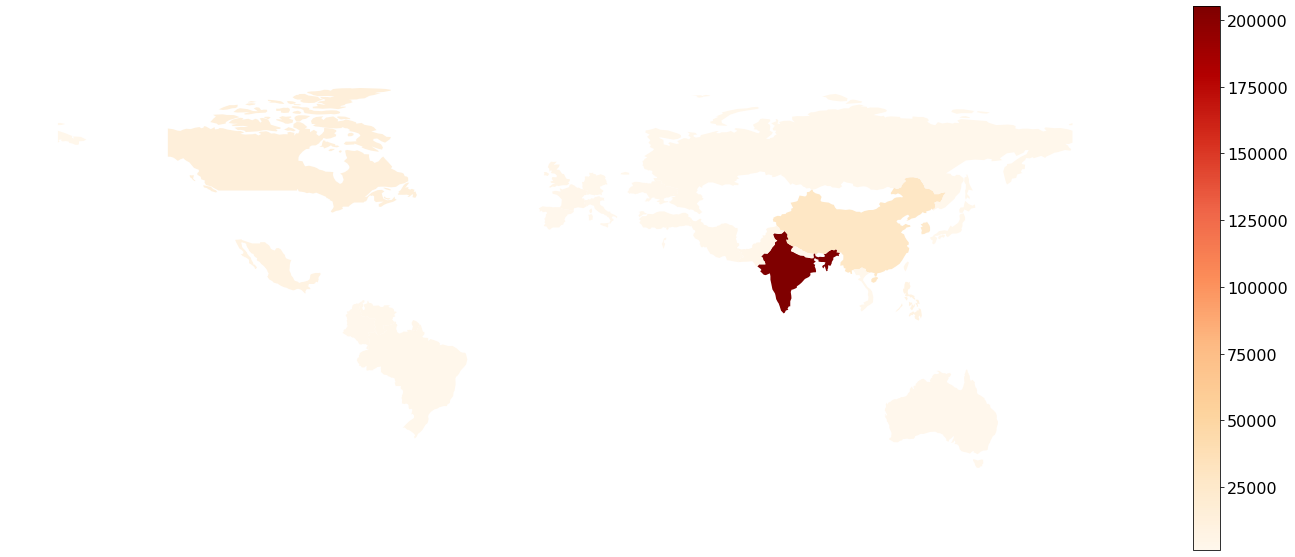

In [665]:
worldmap_df_25.plot(column='application_count', legend=True, cmap='OrRd', figsize=(25, 10))
plt.axis('off')
plt.show()

Es wird ersichtlich, dass sich aufgrund der großen Anzahlunterscheide eine lineare Farbskala nicht zur Darstellung eignet.
Aus diesem Grund haben wir uns für eine Aufteilung in Quantile entschieden.

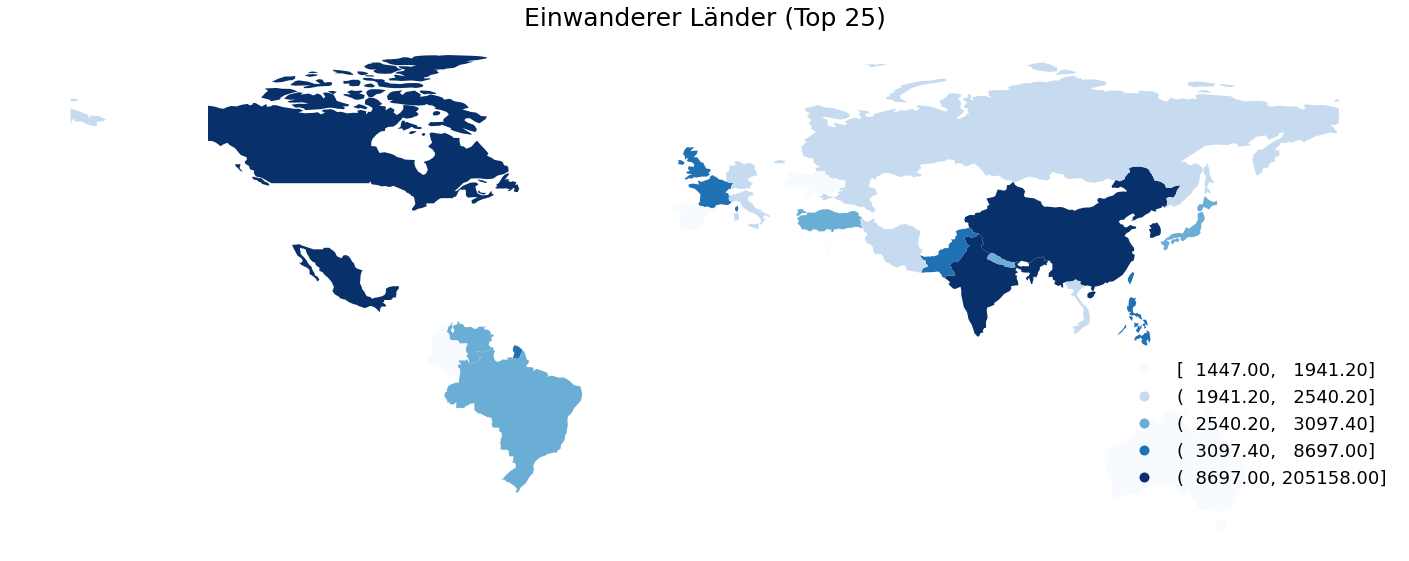

In [666]:
worldmap_df_25.plot(column='application_count', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Blues',legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.0, .4),
                            fontsize=18,
                            frameon=False))
plt.title('Einwanderer Länder (Top 25)',fontsize=25)
plt.axis('off')
plt.show()

In [667]:
#https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b